# Assignment-3

## Problem 1
Modify the second program to allow for the sum of reciprocals. For example, when given
a list of numbers 1,2,3,4, 5 then the sum would be 1/1 + 1/2 + 1/3 + 1/4 + 1/5 = 2.283.
When adding this function, add it locally and use the other sum function and use an inline
lambda function that maps x to 1/x. You can assume zero is never in the list.

In [19]:
def f(*x,**y):
    def s1(x):
        s=0
        if x:
            for i in x:
                s+=i
        return s
    
    def p1(x):
        p=1
        if x:
            for i in x:
                p*=i
        return p

    
    def sum_of_reciprocal(x):
        sum=0
        if x:
            #calling s1 on the list of reciprocal numbers obtained using lambda function
            sum=s1(list(map(lambda i:(1/int(i)),x)))
        return sum



    if y["action"]=="sum":
        return s1(*x)
    elif y["action"]=="product":
        return p1(*x)
    #initialising action for reciprocal sum
    elif y["action"]=="reciprocal sum":
        #*x gives the list of numbers
        return sum_of_reciprocal(*x)
    else:
        return f"bad argument: {y}"

if __name__ == '__main__':
     xlst = [1,2,3,4,5]

#      print("Sum of numbers in x =",f(xlst, action = "sum"))
#      print("Product of numbers in x =",f(xlst, action = "product"))
     print("Sum of reciprocal of numbers in x=",f(xlst, action = "reciprocal sum"))


Sum of numbers in x = 15
Product of numbers in x = 120
Sum of reciprocal of numbers in x= 2.283333333333333


## Output:

Sum of reciprocal of numbers in x= 2.283333333333333

### Execution
On executing this program, for list of numbers in x [1,2,3,4,5] reciprocal is [1/1,1/2,1/3,1/4,1/5] We calculate the sum of the reciprocal list.


## Implementation:

The function f takes input (* x and ** y) where * x represents the numbers in the list and ** y is a dictionary which takes key as action of operations such as sum, product, reciprocal sum etc.We define
1. function sum_of_reciprocal- sum of reciprocal of numbers in list x

__Sum_of_reciprocal(x)__:
Input: list of numbers in x
Output: sum of reciprocal using inline lambda function

The lambda function converts the numbers in the list x to its reciprocal value and stores it as a list using Map.
The map function takes the input 
1. lambda function (x:1/x)
2. list x

We call the s1()-sum fuction on the list to compute sum of reciprocal numbers and return the sum.

**Points to note:**
* We have casted the string numbers in list to integers.`(1/int(i))`


## Problem 2

Using how to read in console information in problem 2, modify the first program so that it can be executed from the console using a list of numbers and the operation. You should not modify the original function–simply add script to read in data from the console.

In [27]:
import argparse


def f(*x,**y):
    #func to calculate sum of numbers in a list
    def s1(x):
        s=0
        if x:
            for i in x:
                s+=i
        return s
    #func to calculate list of numbers in a list
    def p1(x):
        p=1
        if x:
            for i in x:
                p*=i
        return p

    if y["action"]=="sum":
        return s1(*x)
    elif y["action"]=="product":
        return p1(*x)
    else:
        return f"bad argument: {y}"

if __name__=='__main__':


    #initialise argument parser
    parser=argparse.ArgumentParser()
    # #add an argument to parse list of numbers
    # -lst => argument_option for specifying a list
    # nargs => '+' is the Regular expression to accept 1 or more characters of list
    # default => [optional] specifies a default Value
    # help => display the description if help option is given
    parser.add_argument('-lst', nargs='*', default = [],type=int, help="List of numbers")
    parser.add_argument('-op' ,default='sum', help="sum prod etc")
    args=parser.parse_args()
    #args.lst takes the numbers as input for list
    A=args.lst
    #args.op takes the input for operation
    print("{} of number in list ={}".format(args.op,(f(A, action=args.op))))


### Commandline execution:

python3 argparse.py -lst 1 2 3 4 5 -op sum

python3 argparse.py -lst 1 2 3 4 5 -op product


### Output:
python3 argparse.py -lst 1 2 3 4 5 -op sum
> sum of number in list =15

python3 argparse.py -lst 1 2 3 4 5 -op product
> product of number in list =120

### Execution

The program executes by picking the arguments from the commandline.

### Implementation

We have implemented the functions of argparse module  to get the input for the function from the commandline as arguments.

The argpase module allows us to define **options** (eg:lst, op, help) followed by any input if to be given for that option.

In the above Problem we need to generate a list of numbers for the function __F()__ to perform some kind of operation on it which is also passed as commandLine argument.

`python3 argparse.py -lst 1 2 3 4 5 -op sum`

In the above command we see that python3 is followed by  5 arguments:
* argparse.py -> filename.py
* -lst        -> option for list
* 1 2 3 4 5.. -> input of numbers for the list
* -op         -> option for operation
* sum,[product]-> input for option -op on which operation to perform

The argparse module initialises using ArgumentParser().It has option to add arguments that needs to be executed if encountered in the commandLine.We can add multiple arguments and also define the inputs for the options arguments.
Finally the args are parsed using parser_args() using which we can obtain the values from the commandline by calling args.[option_name](eg:args.lst) 

## Problem 3

Add multiplication to the Python class overload asterisk.


In [34]:
import time

class complex_:
    def __init__(self, re=0,im=0):
        self.re=re
        self.im=im
        
    def get_re(self):
        return self.re
    
    def get_im(self):
        return self.im
    
    def __str__(self):
        g=lambda x:"+" if x>=0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)" 
    
    def cadd(self, other):
        new_re=self.get_re()+other.get_re()
        new_im=self.get_im()+other.get_im()
        return complex_(new_re,new_im)
    
    def __add__(self,other):
        new_re= self.get_re()+other.get_re()
        new_im=self.get_im()+other.get_im()
        return complex_(new_re,new_im)
    
    #  multiplication of complex numbers (a+bi)(c+di)=(ac-bd)+(ad+bc)i
        #function definition to calculate product of complex numbers
    def cmul(self,other):
        new_re = ((self.get_re()*other.get_re())-(self.get_im()*other.get_im()))
        new_im = ((self.get_re()*other.get_im())+(self.get_im()*other.get_re()))
        return complex_(new_re,new_im)
    
    #  multiplication of complex numbers (a+bi)(c+di)=(ac-bd)+(ad+bc)i
    #  overiding * operator
    def __mul__(self,other):
        new_re = ((self.get_re()*other.get_re())-(self.get_im()*other.get_im()))
        new_im = ((self.get_re()*other.get_im())+(self.get_im()*other.get_re()))
        return complex_(new_re,new_im)

if __name__=='__main__':
#     start_time=time.time()
    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    
    print("w=",w)
    print("x=",x)
    print("y=",y)
    print("z=",z)
    
    #using function overload
#     print("add(w,x,y,z)=",w.cadd(x).cadd(y).cadd(z))
    print("product of(x,y,z)using function overloading=",x.cmul(y).cmul(z))

    #operator overloading
#     print(w+z)
    print("Product of x,y,z using operator overlaoding=",x*y*z)


w= (1-3i)
x= (-1+3i)
y= (1+3i)
z= (-1-3i)
product of(x,y,z)using function overloading= (10+30i)
Product of x,y,z using operator overlaoding= (10+30i)


### Output:

w= (1-3i)
x= (-1+3i)
y= (1+3i)
z= (-1-3i)

product of(x,y,z)using function overloading= (10+30i)

Product of x,y,z using operator overlaoding= (10+30i)

### Execution:

The original program defines how addition of complex numbers is carried out. I have added the code for calculating product of complex numbers.

### Implementation:

Operator Overloading is the ability of a single operator to perform more than one operation based on the class (type) of operands.

Python has inbuilt Magic methods which can be overloaded to perform different actions. In the above program we have overloaded __mul__() predefined function to perform multiplication of complex numbers.Multiplication of complex numbers is different from ordinary multiplication.The formulae for complex number multiplication is :

`(a+bi)(c+di) = (ac-bd)+(ad+bc)i`

We calculate the Real number and imaginary number multiplication and return it to a str function which will return a string in format of complex numbers.


## Problem 4

Perform an experimental analysis over the three algorithms, average1, average2, average3. In a log-log chart, visualize their running times as a function of the input size.

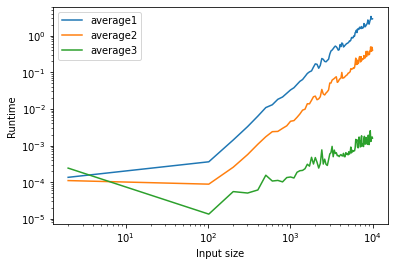

In [49]:
from timeit import default_timer
import matplotlib.pyplot as plt
import random as rn

def average1(S):
    n = len(S)
    my_average = [0]*n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1)
    return my_average

def average2(S):
    n = len(S)
    my_average= [0]*n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    n = len(S)
    my_average = [0]*n
    total = 0
    for j in range(n):
        total += S[j]
        my_average[j] = total / (j+1)
    return my_average

n=[i for i in range(2,10000,100)]

start = time.time()
final_time1=[]
final_time2=[]
final_time3=[]
for i in n:
#     S = [rn.randint(1,100) for _ in range(i)]
    S = list(random.sample(range(0,i),i))
#     print(len(S))
    start1 = time.time()
    avg1 = average1(S)
    final_time1.append(time.time()-start1)
    start2 = time.time()
    avg2 = average2(S)
    final_time2.append(time.time()-start2)
    start3 = time.time()
    avg3 = average3(S)
    final_time3.append(time.time()-start3)
    
# plt.plot(n,final_time1, label = "average1")
# plt.plot(n,final_time2, label = "average2")
# print(final_time3)
# plt.loglog(n,final_time3, label = "average3")
# plt.legend()
# print("alg1 =",n,final_time1)
plt.xlabel("Input size")
plt.ylabel("Runtime")
plt.loglog(n,final_time1, label = "average1")
# print("alg2 =",n,final_time2)
plt.loglog(n,final_time2, label = "average2")
# print("alg3 =",n,final_time3)
plt.loglog(n,final_time3, label = "average3")
plt.legend()

In [ ]:
### Output:

The graph is the output which gives the runtime of three algorithms - which compute the sum average of list of numbers.



## Problem 5

In this question, you will work with the three algorithms, algorithm1, algorithm2, algorithm3,
which check whether a given sequence is unique. Perform an experimental analysis to
determine the largest value of input size such that the given algorithm runs in less than 45
seconds.

input sizeof 1 15000
input sizeof 1 20000
input sizeof 1 25000
input sizeof 1 30000
input sizeof 1 35000
input sizeof 1 40000
input sizeof 1 45000
input sizeof 1 50000
algorithm1 run completed
===========Algorithm 1===========
Algorithm1 with input size =50000, runs in 54.460729360580444 secs


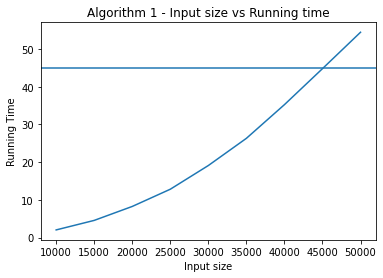

In [30]:
import random
import time
import sys
import matplotlib.pyplot as plt

sys.setrecursionlimit(50000)
def algorithm1(S):
    # print("length=",type(S))
    for j in range(len(S)):
        for k in range(j+1, len(S)):
            if S[j] == S[k]:
                return False
    return True

def algorithm2(S):
#S:sequence
    S = sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
            return False
    return True

def algorithm3(S, start, stop):
#slice S[start:stop],
#S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

def generate_sequence(input_size):
    # input_size=10
    input_list=list(random.sample(range(0,input_size),input_size))
    # print("input_list=",input_list)
    random.shuffle(input_list)
    # print("shuffled list=",input_list)
    # print("length =",len(input_list))
    return input_list

def call_algorithm1(step_size):
    input_size=10000
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        start_time=time.time()
        output=algorithm1(input_list)
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
        print("input sizeof 1",input_size)
    print("algorithm1 run completed")
    plt.title("Algorithm 1 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)

def call_algorithm2(step_size):
    input_size=1000
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        start_time=time.time()
        output=algorithm2(input_list)
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
        print("input sizeof 2",input_size)
    print("algorithm2 run completed")
    plt.title("Algorithm 2 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)

def call_algorithm3(step_size):
    input_size=10
    input_size_list=[]
    total_time_list=[]
    while True:
        input_list=generate_sequence(input_size)
        print("input_size: {}".format(input_size))
        start_time=time.time()
        output=algorithm3(input_list,0,len(input_list))
        end_time=time.time()
        input_size_list.append(input_size)
        total_time_list.append(end_time-start_time)
        print("input sizeof 3",input_size,(end_time-start_time))
        if((end_time-start_time)>=45):
            break
        else:
            input_size=input_size+step_size
    print("algorithm3 run completed")
    plt.title("Algorithm 3 - Input size vs Running time")
    plt.xlabel("Input size")
    plt.ylabel("Running Time")
    plt.plot(input_size_list,total_time_list)
    plt.axhline(y=45)
    return (input_size,end_time-start_time)


    step_size1,time1=call_algorithm1(5000)
    step_size2,time2=call_algorithm2(10000000)
    step_size3,time3=call_algorithm3(2)

    print("===========Algorithm 1===========")
    print("Algorithm1 with input size ={}, runs in {} secs" .format(step_size1,time1))
    print("===========Algorithm 2===========")
    print("Algorithm2 with input size ={}, runs in {} secs".format(step_size2,time2))
    print("===========Algorithm 3===========")
    print("Algorithm3 with input size ={}, runs in {} secs".format(step_size3,time3))


input sizeof 2 10001000
input sizeof 2 20001000
input sizeof 2 30001000
input sizeof 2 40001000
input sizeof 2 50001000
input sizeof 2 60001000
input sizeof 2 70001000
input sizeof 2 80001000
input sizeof 2 90001000
input sizeof 2 100001000
input sizeof 2 110001000
algorithm2 run completed
===========Algorithm 2===========
Algorithm2 with input size =110001000, runs in 49.773101568222046 secs


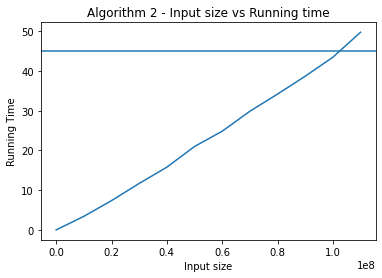

In [31]:
    step_size2,time2=call_algorithm2(10000000)
    print("===========Algorithm 2===========")
    print("Algorithm2 with input size ={}, runs in {} secs".format(step_size2,time2))    

input_size: 10
input sizeof 3 10 9.489059448242188e-05
input_size: 12
input sizeof 3 12 0.0005209445953369141
input_size: 14
input sizeof 3 14 0.002403736114501953
input_size: 16
input sizeof 3 16 0.008868932723999023
input_size: 18
input sizeof 3 18 0.02250981330871582
input_size: 20
input sizeof 3 20 0.08937478065490723
input_size: 22
input sizeof 3 22 0.36470937728881836
input_size: 24
input sizeof 3 24 1.4622056484222412
input_size: 26
input sizeof 3 26 5.9023027420043945
input_size: 28
input sizeof 3 28 23.801985502243042
input_size: 30
input sizeof 3 30 93.68721866607666
algorithm3 run completed
===========Algorithm 3===========
Algorithm3 with input size =30, runs in 93.68721866607666 secs


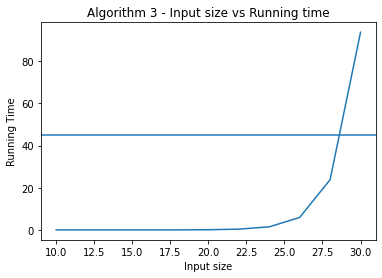

In [32]:
    step_size3,time3=call_algorithm3(2)
    print("===========Algorithm 3===========")
    print("Algorithm3 with input size ={}, runs in {} secs".format(step_size3,time3))

### Output:

Input size for Algorithm1: Approximately around 45000
Input size for Algorithm2: Approximately around 1.e8
Input size for Algorithm3: Approximately around 28

### Execution:

For the given 3 algorithms we calculate inputsize for a execution time of 45secs. It is compared using
